https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

X1 Relative Compactness  
X2 Surface Area  
X3 Wall Area  
X4 Roof Area  
X5 Overall Height  
X6 Orientation  
X7 Glazing Area  
X8 Glazing Area Distribution  
y1 Heating Load  
y2 Cooling Load  



Data Analysis Objective: Given the Heating Load curve and Cooling Load curve, optimise the function so as to obtain the minimal heating and cooling load and there by  find the optimal parameter values.   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.optimize import minimize, curve_fit

Equation for Heating Load Y1   
= exp(10.5544 -4.6256*X1 - 0.0098*X2 + 0.0065*X3 + 0.7898*X7 +0.38629*X8(If Value == 1) + 0.3221*X8(If Value ==2) +0.3096*X8(If value ==3) + 0.3192*X8(If value == 4) + 0.3082*X8(If value == 5)  

Equation for Cooling Load Y2  
= exp(11.7856 -5.1108*X1 - 0.0097*X2 + 0.0051*X3 + 0.641*X7)  

where X1 stands for Relative Compactness, X2 for Surface Area , X3 for wall area, X7 for Glazing Area and X8 for Glazing Area Distribution  

In [3]:
energy_data = pd.read_excel("ENB2012_data.xlsx")

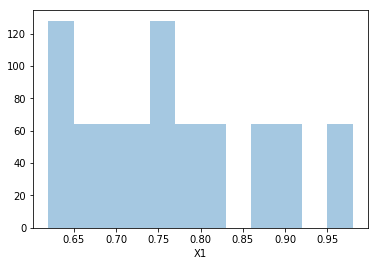

In [4]:
## Distribution of X1 , X2 , X3 and X7
sns.distplot(energy_data['X1'], kde= False)

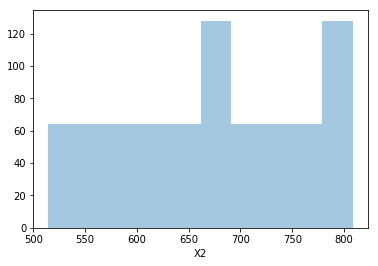

In [5]:
sns.distplot(energy_data['X2'], kde= False)

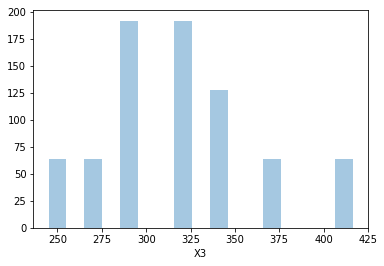

In [6]:
sns.distplot(energy_data['X3'], kde= False)

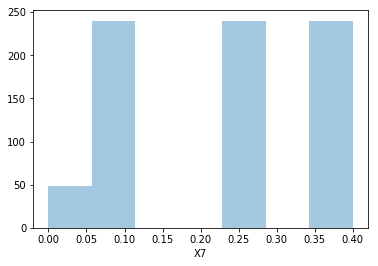

In [7]:
sns.distplot(energy_data['X7'], kde= False)

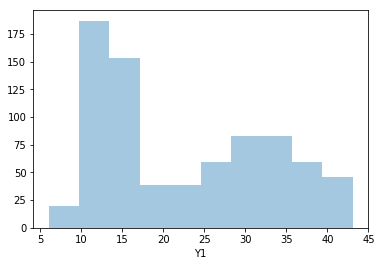

In [8]:
sns.distplot(energy_data['Y1'], kde= False)

In [9]:
## Find out the max and min values for X1 , X2 , X3 and X7 from the data 
min_X1 = energy_data['X1'].min()
max_X1 = energy_data['X1'].max()

##
min_X2 = energy_data['X2'].min()
max_X2 = energy_data['X2'].max()
##
min_X3 = energy_data['X3'].min()
max_X3 = energy_data['X3'].max()
##
min_X7 = energy_data['X7'].min()
max_X7 = energy_data['X7'].max()


In [10]:
def objective_heat_load(x):
    X1 = x[0]
    X2 = x[1]
    X3 = x[2]
    X7 = x[3]
    
    y1 = np.exp(10.5544 - 4.6256*X1 - 0.0098*X2 + 0.0065*X3 +0.7898*X7 )
    return y1 

In [11]:
def cons_1(x):
    X7 = x[3]
    return X7 -0 

In [12]:
bounds = ((min_X1,max_X1),(min_X2,max_X2),(min_X3,max_X3),(min_X7,max_X7))
## Initial guess values 
#x_i = np.array([energy_data['X1'].median(),energy_data['X2'].median(),energy_data['X3'].median(),energy_data['X7'].median()])
x_i = np.array([1,1,1,1])
cons = {"type" :"ineq" , "fun" :cons_1 }

In [13]:
soln1 = minimize(objective_heat_load, x_i, method = 'SLSQP', bounds = bounds , constraints = cons, options = {"disp":True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.7338225772166445
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10


In [14]:
parameters1 = soln1.x
min_heating = soln1.fun

In [15]:
print("For Minimum heating load :")
print("X1 : {}".format(parameters1[0]))
print("X2 {}".format(parameters1[1]))
print("X3 :{}".format(parameters1[2]))
print("X7 :{}".format(parameters1[3]))
print("Minimum heat load is: {}".format(min_heating))


For Minimum heating load :
X1 : 0.98
X2 808.5
X3 :245.0
X7 :0.0
Minimum heat load is: 0.7338225772166445


The optimal value for relative compactness is 0.98, surface area is 808.5 , wall area of 245 and zero glaze area. As per the research, we can change the constraints on each of the variables to get the new optimal parameter values for least heating load.  

In [16]:
def objective_cool_load(x):
    X1 = x[0]
    X2 = x[1]
    X3 = x[2]
    X7 = x[3]
    
    y2 = np.exp(11.7856 -5.1108*X1 - 0.0097*X2 + 0.0051*X3 + 0.641*X7)
    
    return y2 

In [17]:
soln2 = minimize(objective_cool_load, x_i, method = 'SLSQP', bounds = bounds , constraints = cons, options = {"disp":True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.2020951587586859
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10


In [18]:
parameters2 = soln2.x
min_cooling = soln2.fun

In [19]:
print("For Minimum cooling load :")
print("X1 : {}".format(parameters2[0]))
print("X2 {}".format(parameters2[1]))
print("X3 :{}".format(parameters2[2]))
print("X7 :{}".format(parameters2[3]))
print("Minimum cooling load is: {}".format(min_cooling))


For Minimum cooling load :
X1 : 0.9799999999999981
X2 808.5
X3 :245.0
X7 :0.0
Minimum cooling load is: 1.2020951587586859


Its seen that, with the same set of values for X1 , X2 , X3 and X7 , we get the least cooling load.

In [24]:
## From the data , what parameters give the least Y1 and Y2.
energy_data[energy_data['Y1'] ==energy_data['Y1'].min()]

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
26,0.74,686.0,245.0,220.5,3.5,4,0.0,0,6.01,10.94


In [25]:
energy_data[energy_data['Y2'] ==energy_data['Y2'].min()]

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
24,0.74,686.0,245.0,220.5,3.5,2,0.0,0,6.07,10.9
